<div style="width: 100%; overflow: hidden;">
    <div style="width: 500px; float: left;"> 
        <h1>Ingenieurinformatik – Übung</h1>
        Lehrstuhl <b>Computational Civil Engineering</b><br>
        Kontakt: <a href = "mailto: cce-inginf@uni-wuppertal.de">Email senden</a> | Individuelle Kontakte siehe Webseite des Lehrstuhls<br>
        Links: 
        <a href="cce.uni-wuppertal.de/inginf">Vorlesungsskript</a> | 
        <a href="cce.uni-wuppertal.de/">Webseite des Lehrstuhls</a>
    </div>
    <div style="float:right;"> 
        <img src="logo_cce_combined.png" style="width:150px;"/>
    </div>
</div>

# Aufgabe 3.5 – Fitting und Interpolation

## Aufgabenteil A1

### Aufgabenstellung

In der Datei <a href='messwerte.txt' download>messwerte.txt</a> finden Sie 15 Messwerte entsprechend einer leicht verrauschten Normalverteilung. Nutzen Sie `numpy.polyfit`, um Polynome an die Messwerte zu fitten. Erstellen Sie Fits von Grad 1 bis zur Interpolation bei Grad 14 und plotten Sie diese. 

### Lösungsvorschlag

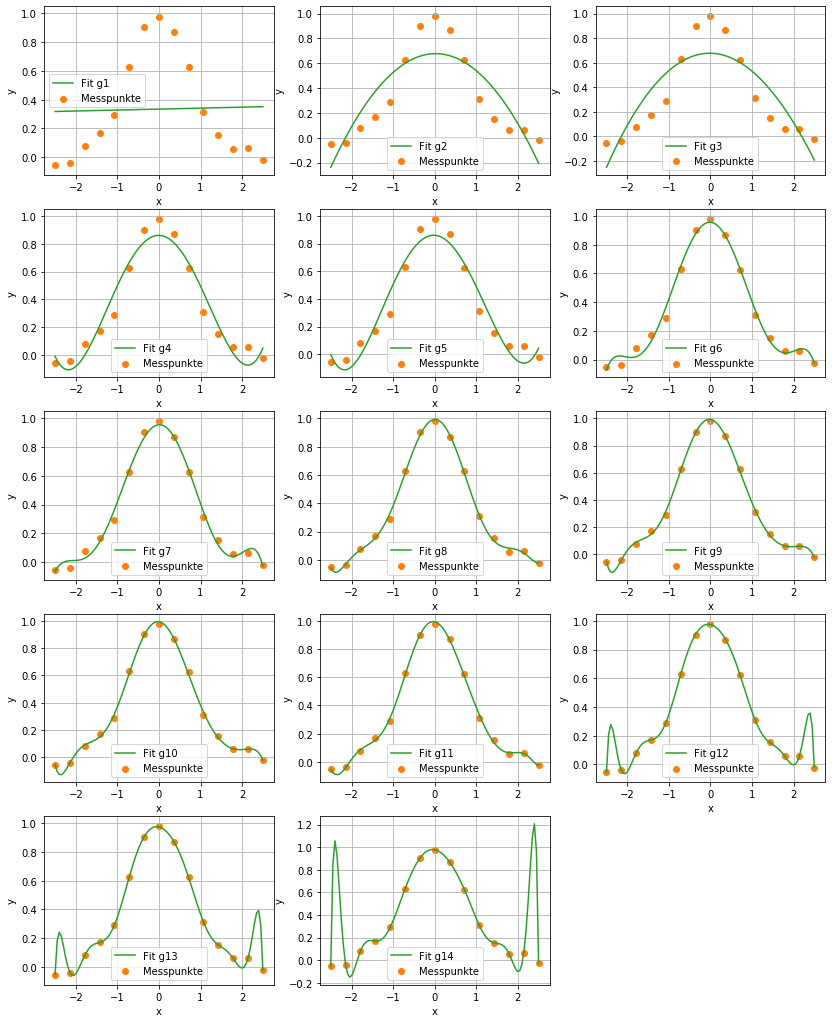

In [6]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('messwerte.txt')
data_x = data[:, 0]
data_y = data[:, 1]

plt.figure(figsize=[14, 18])

for i in range(1, 15):

    P = np.polyfit(data_x, data_y, i)

    fit_x = np.linspace(-2.5, 2.5, 100)

    plt.subplot(5,3,i)
    plt.scatter(data_x, data_y, color='C1', label="Messpunkte")
    plt.plot(fit_x, np.polyval(P, fit_x), color='C2', label=f'Fit g{i}')

    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid();

## Aufgabenteil A2
### Aufgabenstellung
Beantworten Sie folgende Fragen:
1. Warum scheinen manche Fits identisch zu sein?
1. Wenn man, wie in der Vorlesung beschrieben, belibige Funktionen mit einem Polynom annähren kann und die Messdaten mithilfe einer Funktion erzeugt wurden, wieso wird der Fit ab einem gewissen Grad wieder schlechter?
1. Wie würden sich mehr Messwerte im gleichen Intervall auf die Fits auswirken? 

### Lösungsvorschlag

1. Das manche Fits fast identisch sind hängt mit dem Konvergenzverhalten der Polynome zusammen. Ein Polynom mit einem um eins höhren Grad hat zwar einen Freiheitsgrad mehr, in Form eines zusätzlichen Koeffizienten, allerdings ändert sich die Konvergenz. Polynome mit geradem Grad konvergieren gegen $\pm \infty, \pm \infty$ während solche mit ungradem Grad gegen $\pm \infty, \mp \infty$ konvergieren. Messwerte, die annährend Spiegelsymmetrisch verteilt sind, lasssen sich desswegen oft besser durch Polynome mit geradem Grad annähren und eine Erhöhung zu einem ungeraden Grad führt nur zu kleinen Verbesserungen.
1. Es gibt zwei Gründe, warum der Fit sich nicht kontinuierlich der zugrundeliegenden Funktion annährt. Zum einen sind die Daten verrauscht, was bedetet, dass die unverrauschte Funktion die Daten überhaupt nicht exakt darstellt. Ab einem gewissen Grad, hier 8 (siehe Aufgabenteil C) stellen die Fits die Daten genauer dar. Der andere Grund ist, dass selbst bei unverrauschten Daten, nicht die zugrundeliegende Funktion angenährt wird, sondern die interpolierte im letzten Plot.
1. Mehr Messwerte bedeuten mehr Information über die Form der ursprünglichen Funktion sowie eine Reduzierung des Einflusses des Rauschens, was beides zu Fits führt, die die unterliegende Funktion besser darstellen.

## Aufgabenteil B1
### Aufgabenstellung

Die Funktion, welche zum Erzeugen der Daten verwendet wurde, ist $\exp(-x^2)$. Berechnen Sie die L2-Norm aller ihrer Fits. Tragen Sie die Abstände gegen den Grad des Fits auf. Berechnen Sie außerdem den Abstand zwichen den Messwerten und der ursprünglichen Funktion und tragen Sie das Ergebniss als Gerade in ihren Fit ein. Fitten Sie die gleichen Daten ein weiteres Mal, diesmal jedoch mit logarithmisch aufgetragenem Abstand. Ignorieren Sie hierbei die Interpolation.

### Lösungsvorschlag

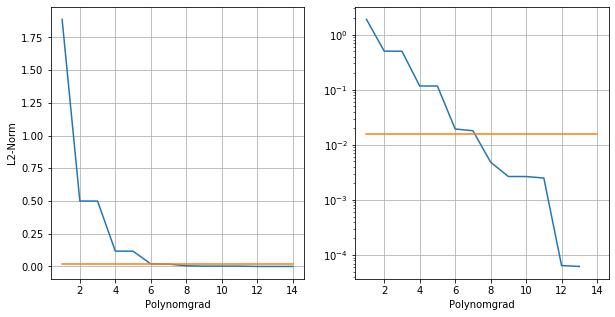

In [22]:
# Bestimmung der L2-Norm

def l2_norm(y, func_y):
    return np.sum((y-func_y)**2) 

norm_fits = []
for i in range(1,15):
    P = np.polyfit(data_x, data_y, i)
    norm_fits.append(l2_norm(data_y, np.polyval(P, data_x)))
    
norm_func = l2_norm(data_y, np.exp(-(data_x)**2))
    
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.xlabel('Polynomgrad')
plt.ylabel('L2-Norm')
plt.grid()
plt.plot(list(range(1, 15)), norm_fits)
plt.plot([1,14],[norm_func, norm_func]);

plt.subplot(1,2,2)
plt.yscale('log')
plt.xlabel('Polynomgrad')
plt.grid()
plt.plot(list(range(1, 14)), norm_fits[0:-1])
plt.plot([1,14],[norm_func, norm_func]);


## Aufgabenteil B2
### Aufgabenstellung

Beantworten Sie folgende Fragen:
1. Wann ist eine logarithmische Darstellung von Daten sinnvoll?
1. Wieso haben die Plots Plateaus?
1. Wieso ist es sinnvoll, die Interpolation beim logarithmischen Plot wegzulassen?

### Lösungsvorschlag

1. Eine logarithmische Darstellung von Daten ist oft dann sinnvoll, wenn diese auf mindestens einer Achse mehrere Größenordnungen umfassen und Details in den kleineren Größenordnungen von Bedeutung sind. Wie in den Plots von Aufgabenteil B1 zu sehen, lassen sich so auch bei höheren Polynomgraden Details ablesen, die in dem linearen Plot verloren gegangen sind.
1. Die Plateaus korrespondieren mit der Ähnlichkeit der zugehörigen Fits (siehe Aufgabe A2.1).
1. Da die L2-Norm zwischen der interpolierten Funktion und den Daten bis auf einen numerischen Rundungsfehler Null ist, führt dies zu einem Problem mit der logarithmischen Darstellung, da die Null in dieser nicht dargestellt werden kann. Und auch wenn die Norm nicht ganz Null ist, ist sie um viele Größenordnungen kleiner als die Nrom zwischen vorherigem Grad und Daten, was beim Plotten wieder zu einem Verlust von sichtbaren Details führen würde.